# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download the insurance Dataset](https://www.kaggle.com/datasets/mosapabdelghany/medical-insurance-cost-dataset)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Librarays

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Import CSV file

In [2]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# EDA

In [8]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

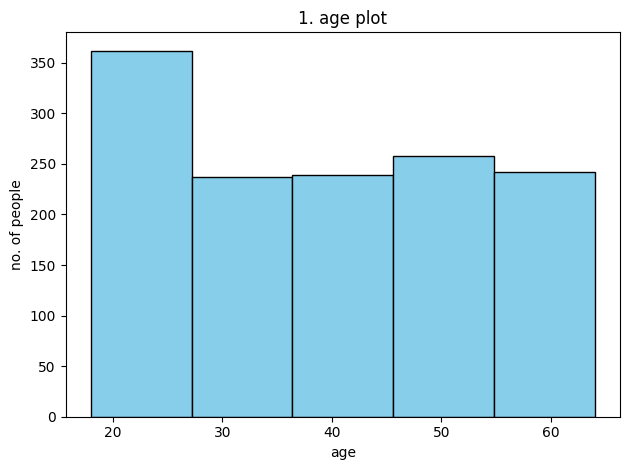

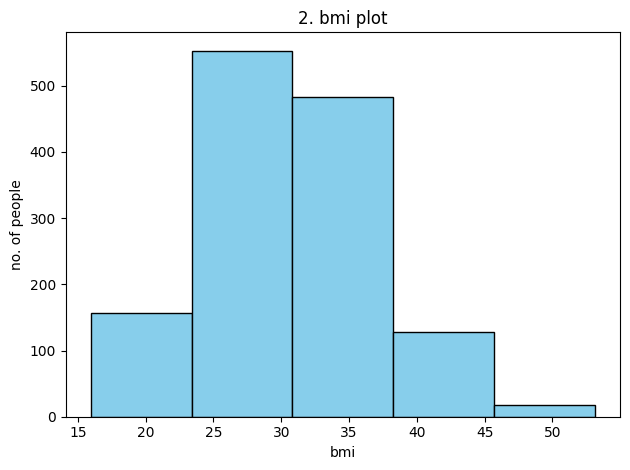

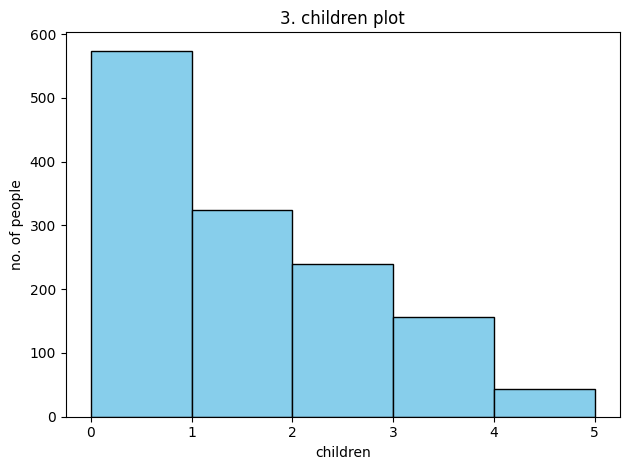

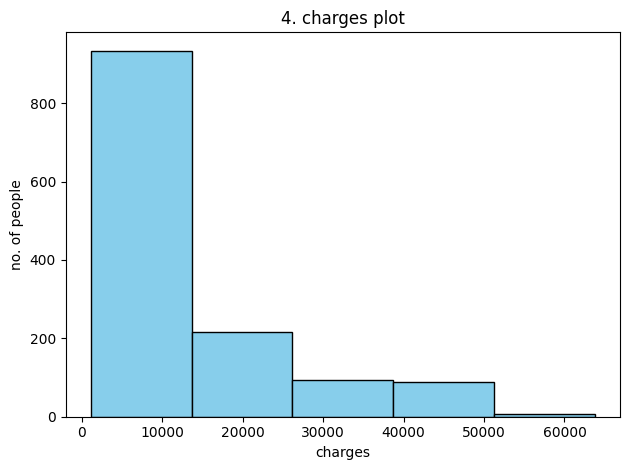

In [9]:
for col in df.select_dtypes(include='number').columns:
  plt.hist(df[col], bins=5, color='skyblue', edgecolor='black')

  plt.xlabel(f'{col}')
  plt.ylabel('no. of people')
  plt.title(f'{plot_no}. {col} plot')
  plot_no += 1
  show_fig()

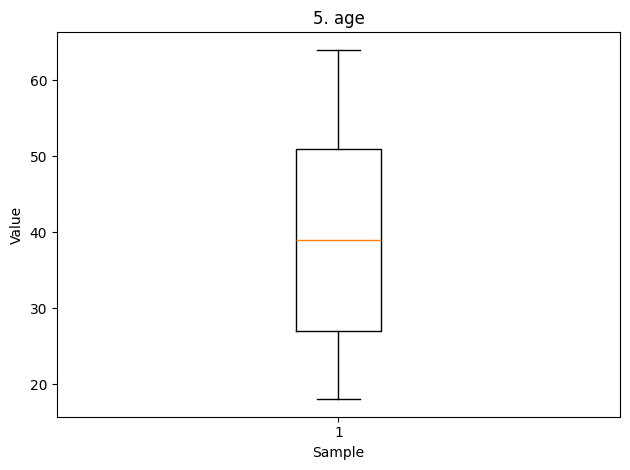

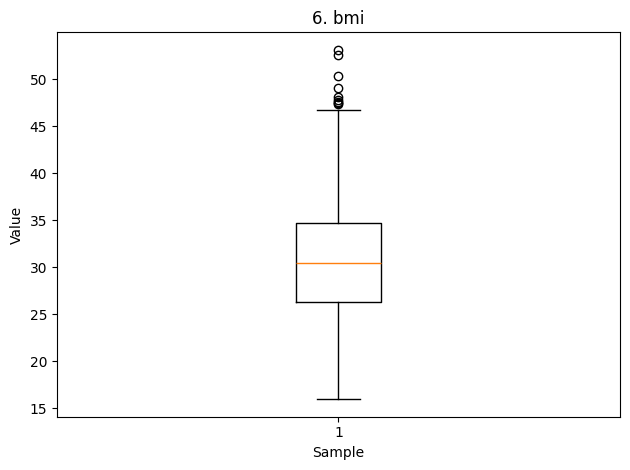

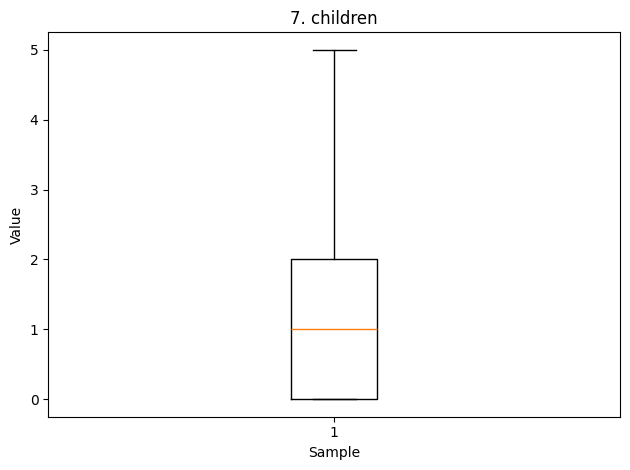

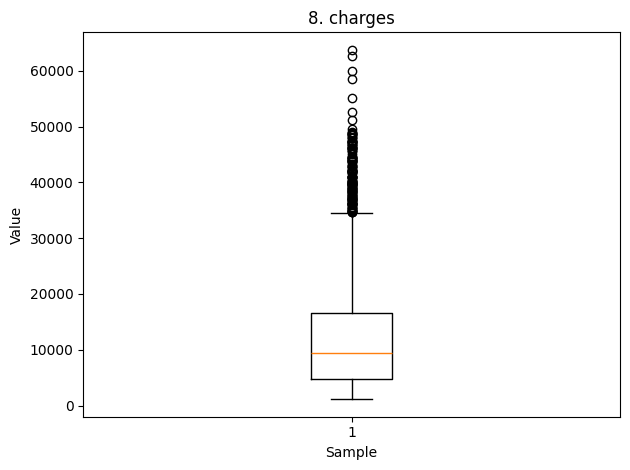

In [10]:
for col in df.select_dtypes(include='number').columns:
  plt.boxplot(df[col])
  plt.xlabel('Sample')
  plt.ylabel('Value')
  plt.title(f'{plot_no}. {col}')
  plot_no += 1
  show_fig()

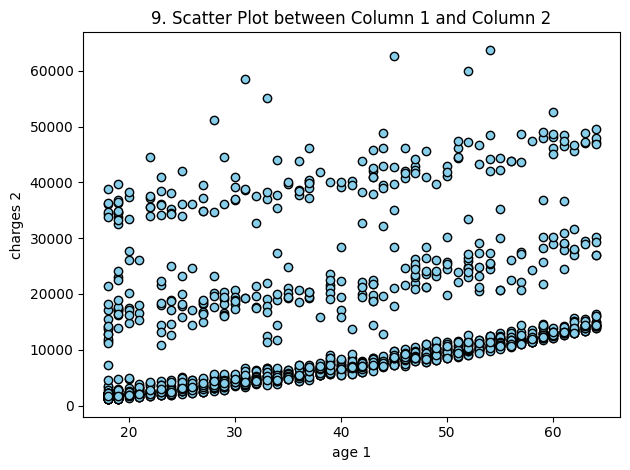

In [11]:
plt.scatter(df['age'], df['charges'], color='skyblue', edgecolor='black')
plt.xlabel('age 1')
plt.ylabel('charges 2')
plt.title(f'{plot_no}. Scatter Plot between Column 1 and Column 2')
show_fig()
plot_no += 1

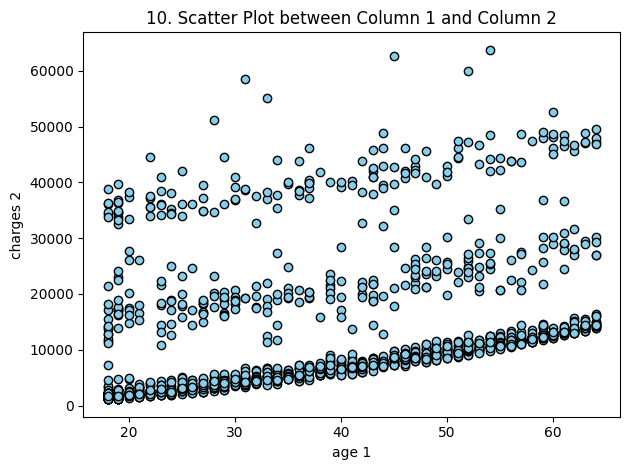

In [12]:
plt.scatter(df['age'], df['charges'], color='skyblue', edgecolor='black')
plt.xlabel('age 1')
plt.ylabel('charges 2')
plt.title(f'{plot_no}. Scatter Plot between Column 1 and Column 2')
show_fig()
plot_no += 1

In [13]:
df = pd.get_dummies(df, drop_first=True)

In [14]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [15]:
df.tail()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1333,50,30.97,3,10600.5483,True,False,True,False,False
1334,18,31.92,0,2205.9808,False,False,False,False,False
1335,18,36.85,0,1629.8335,False,False,False,True,False
1336,21,25.80,0,2007.9450,False,False,False,False,True
1337,61,29.07,0,29141.3603,False,True,True,False,False


In [16]:
X = df.drop('charges', axis=1)
y = df['charges']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model=LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
y_pred = model.predict(X_test)

In [20]:
from tabulate import tabulate
table = np.column_stack((y_test,y_pred))
print(tabulate(table[:10], headers = ("Actual Data","Predicted Data"), tablefmt="fancy_grid"))

╒═══════════════╤══════════════════╕
│   Actual Data │   Predicted Data │
╞═══════════════╪══════════════════╡
│       9095.07 │         8969.55  │
├───────────────┼──────────────────┤
│       5272.18 │         7068.75  │
├───────────────┼──────────────────┤
│      29331    │        36858.4   │
├───────────────┼──────────────────┤
│       9301.89 │         9454.68  │
├───────────────┼──────────────────┤
│      33750.3  │        26973.2   │
├───────────────┼──────────────────┤
│       4536.26 │        10864.1   │
├───────────────┼──────────────────┤
│       2117.34 │          170.281 │
├───────────────┼──────────────────┤
│      14210.5  │        16903.5   │
├───────────────┼──────────────────┤
│       3732.63 │         1092.43  │
├───────────────┼──────────────────┤
│      10264.4  │        11218.3   │
╘═══════════════╧══════════════════╛


In [21]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [22]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 33596915.85136146
R2 Score: 0.7835929767120723


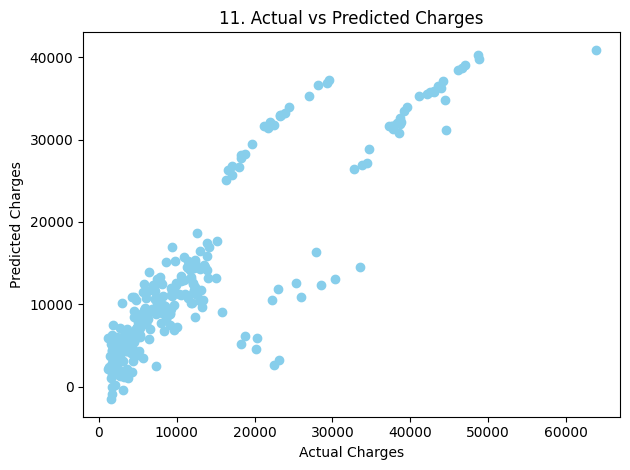

In [23]:
plt.scatter(y_test, y_pred, color='skyblue')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title(f'{plot_no}. Actual vs Predicted Charges')
show_fig()
plot_no += 1

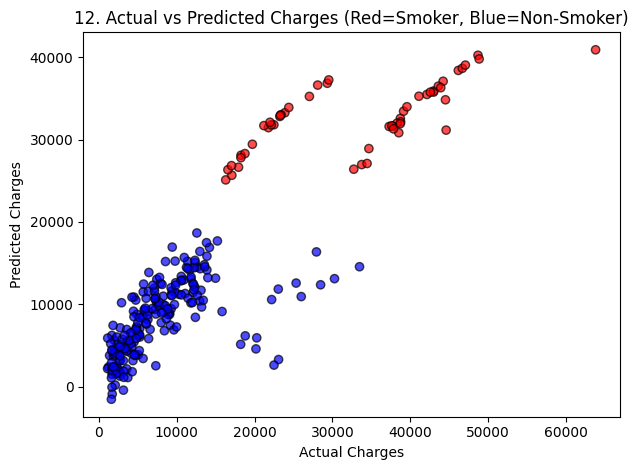

In [24]:
colors = ['red' if smoker else 'blue' for smoker in X_test['smoker_yes']]

plt.scatter(y_test, y_pred, c=colors, edgecolor='black', alpha=0.7)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title(f'{plot_no}. Actual vs Predicted Charges (Red=Smoker, Blue=Non-Smoker)')
show_fig()
plot_no += 1

In [25]:
from sklearn.metrics import mean_squared_error
mean_pred = [y_test.mean()] * len(y_test)
mse_baseline = mean_squared_error(y_test, mean_pred)
print("Baseline MSE:", mse_baseline)

Baseline MSE: 155248731.4917735


In [26]:
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)
print('Mean Charge:', df['charges'].mean())

Root Mean Squared Error: 5796.2846592762735
Mean Charge: 13270.422265141257
